# Visualisation initiales des donn&eacute;es

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## Les donn&eacute;es

In [3]:
data = nc.Dataset('Donnees/Donnees_PIE_Meteo.nc')

Pour se faire une idée du contenu du fichier .netcdf :

In [4]:
for var in data.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 GP_GDS0_PVL(initial_time0_hours, g0_lat_1, g0_lon_2)
    forecast_time_units: hours
    forecast_time: 0
    level: 2000
    parameter_number: 6
    parameter_table_version: 1
    gds_grid_type: 0
    level_indicator: 117
    _FillValue: 1e+20
    units: m^2/s^2
    long_name: Geopotential
    center: French Weather Service - Toulouse
unlimited dimensions: 
current shape = (31, 361, 720)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 POT_GDS0_PVL(initial_time0_hours, g0_lat_1, g0_lon_2)
    forecast_time_units: hours
    forecast_time: 0
    level: 2000
    parameter_number: 13
    parameter_table_version: 1
    gds_grid_type: 0
    level_indicator: 117
    _FillValue: 1e+20
    units: K
    long_name: Potential temperature
    center: French Weather Service - Toulouse
unlimited dimensions: 
current shape = (31, 361, 720)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 initial_time0_hours(initial_time0_hours)
    units: hours s

In [5]:
print(data['initial_time0'][30,:])

[b'0' b'1' b'/' b'3' b'1' b'/' b'2' b'0' b'1' b'6' b' ' b'(' b'0' b'0'
 b':' b'0' b'0' b')']


### Les dimensions

<ul>
    <li> Temps : 31 échantillons </li>
    <li> Latitude : 361 échantillons </li>
    <li> Longitude : 720 échantillons </li>
</ul>

### Les variables d'int&eacute;r&ecirc;t

<ul>
    <li> 'GP_GDS0_PV' : Le géopotentiel (potentiel gravitationnel au niveau de la tropopause)</li>
    <li> 'POT_GDS0_PV' : La température potentielle (température que le fluide aurait à la pression $P_0=1000hPa$ - moyennant un transport adiabatique)</li>
</ul>

**Ces données sont donc de taille [31,361,720]**

## Visualisation

### A un instant t fixé

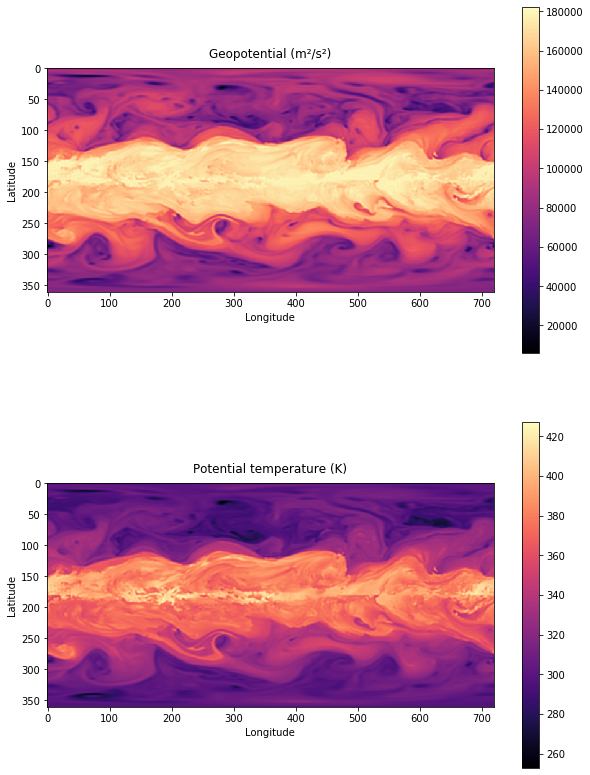

<Figure size 1080x1584 with 0 Axes>

In [6]:
## t entier entre 0 et 30 inclus
t = 28


#### Affichage
fig, (ax1, ax2) = plt.subplots(figsize=(10,14), nrows=2)
plt.figure(figsize=(15,22))

## Geopotentiel
geop = ax1.imshow(data['GP_GDS0_PVL'][t,:,:],cmap='magma')
ax1.set_title('Geopotential (m²/s²)',pad=10)
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')
fig.colorbar(geop,ax=ax1)

## Temperature potentielle
temp = ax2.imshow(data['POT_GDS0_PVL'][t,:,:],cmap='magma')
ax2.set_title('Potential temperature (K)',pad=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Longitude')
fig.colorbar(temp,ax=ax2)

plt.show()

### Vid&eacute;o 

In [6]:
def video(nb):
    frames = []
    fig,ax= plt.subplots(figsize=(10,7))
    
    if (nb==0) :
        donnee='GP_GDS0_PVL'
        ax.set_title('Geopotential (m²/s²)',pad=10)
    else :
        donnee='POT_GDS0_PVL'
        ax.set_title('Potential temperature (K)',pad=10)
        
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    for i in range(31):
        im = plt.imshow(data[donnee][i,:,:], cmap ='magma', animated=True)
        frames.append([im])

    anim = animation.ArtistAnimation(fig, frames, 
                                     interval=150, ## Video plus ou moins rapide/fluide 
                                     blit=True,
                                     repeat=False) ## Reprendre au début à la fin

    return anim

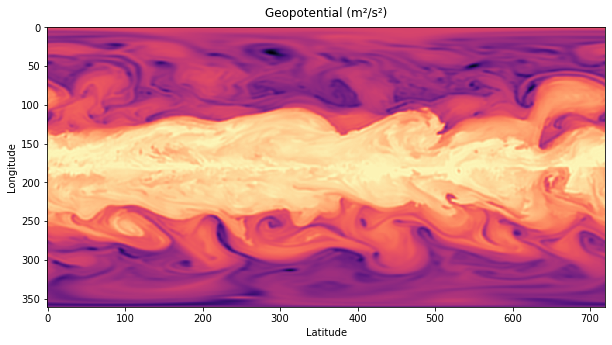

In [7]:
## Variable d'intérêt à afficher
## Géopotentiel : 0  
## Température potentielle : 1
var = 0

HTML(video(var).to_html5_video())